# Import libraries 

In [38]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# conda install -c conda-forge mlxtend

In [3]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 1.0 MB/s eta 0:00:00


In [35]:
data=pd.read_csv("book.csv")
data.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data[data.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori Algorithm 

In [63]:
#here we take min_support=0.1

frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True,)
frequent_itemsets.head()


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [58]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


<StemContainer object of 3 artists>

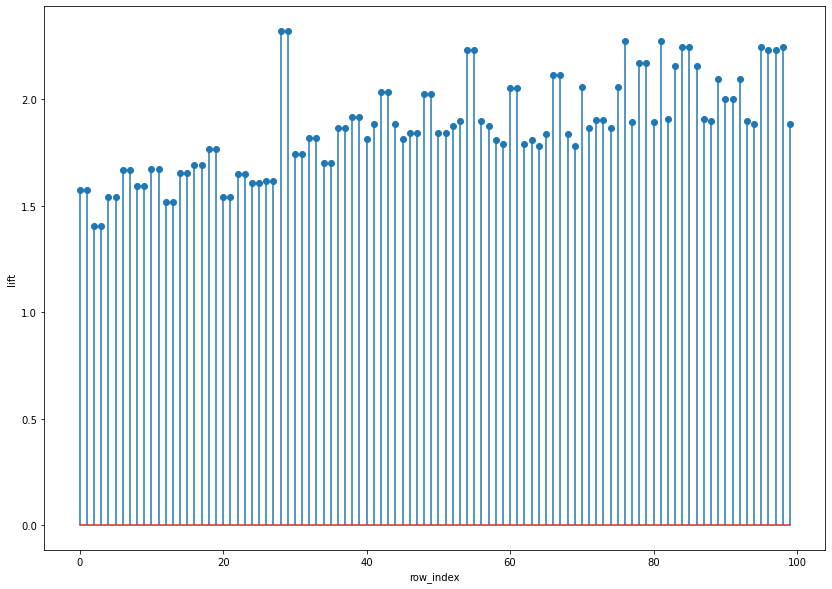

In [59]:
 #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules)),np.round(rules["lift"],4))


<StemContainer object of 3 artists>

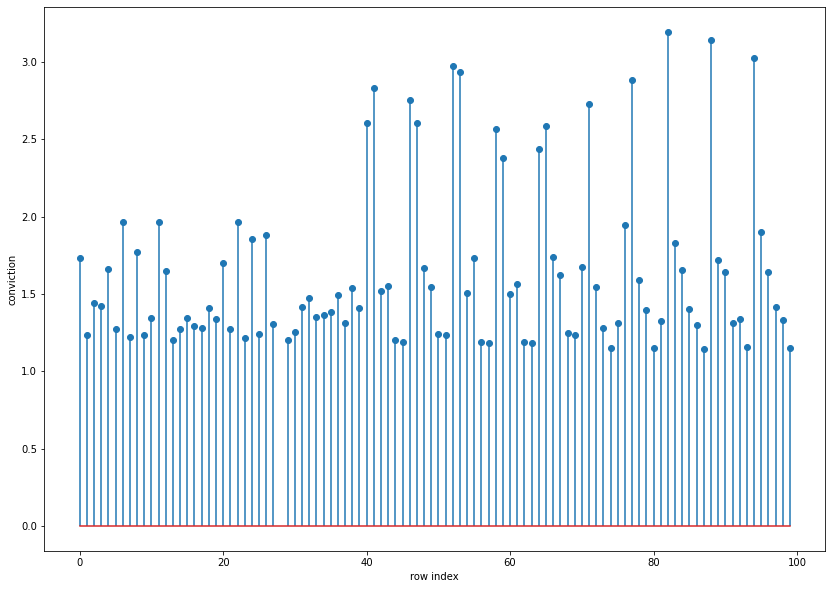

In [60]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules)),np.round(rules["conviction"],4))


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
*A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]


In [64]:
rules.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [65]:
## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules[rules.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


### here we take min_support=0.19 and min_threshold=0.9


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<StemContainer object of 3 artists>

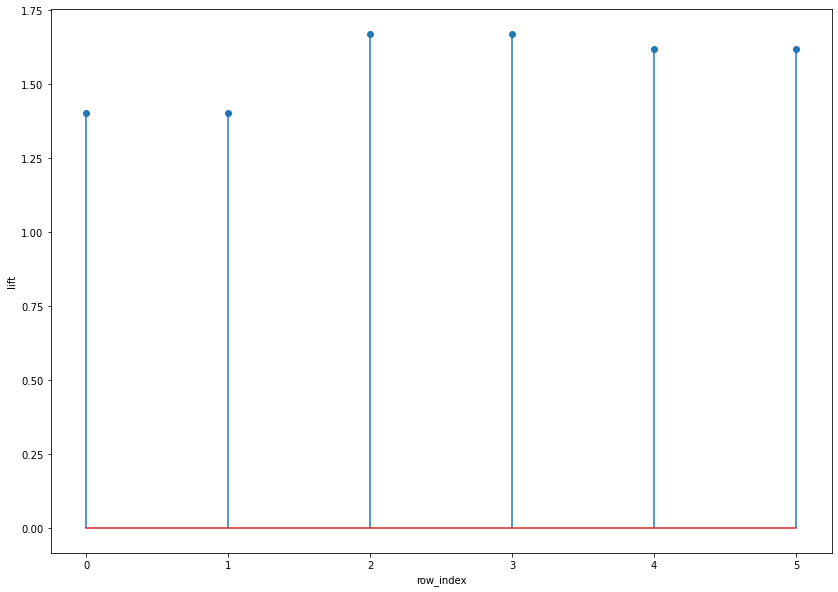

In [81]:
frequent_itemsets1 = apriori(data, min_support=0.19, use_colnames=True,)
frequent_itemsets1.head()


rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.9)

#### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules1)),np.round(rules1["lift"],4))



In [82]:
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


<StemContainer object of 3 artists>

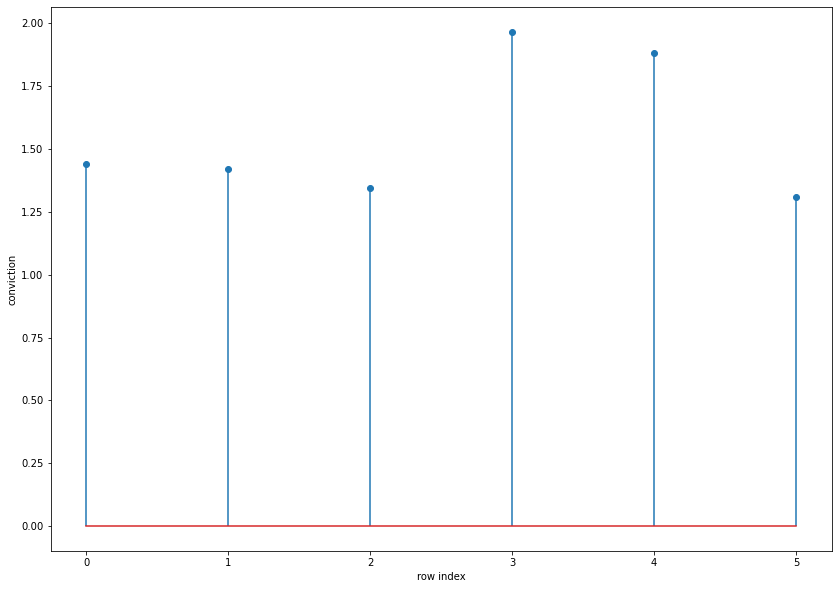

In [83]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules1)),np.round(rules1["conviction"],4))




In [84]:
#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules1.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules1[rules1.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


### here we take min_support=0.2,min_threshold=0.9


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<StemContainer object of 3 artists>

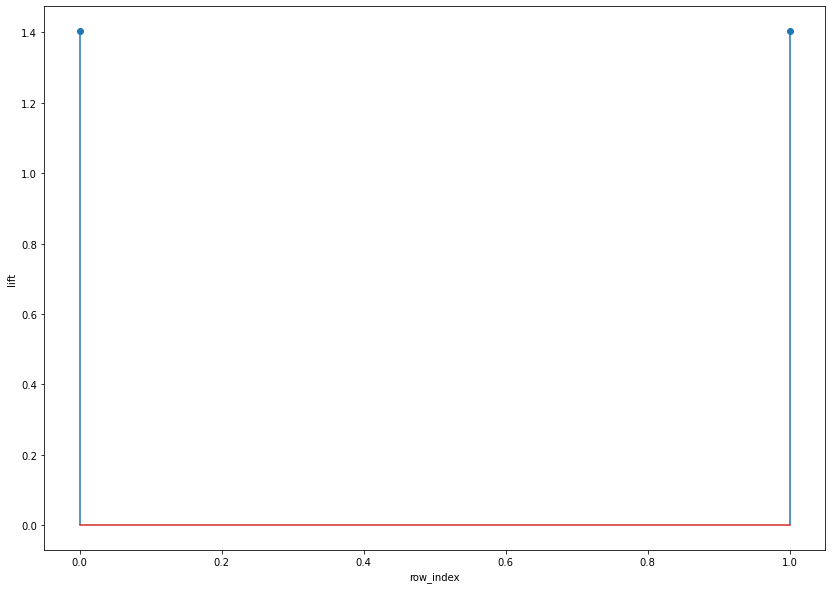

In [92]:

frequent_itemsets2 = apriori(data, min_support=0.2, use_colnames=True,)
frequent_itemsets2.head()

rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.9)

   #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules2)),np.round(rules2["lift"],4))




In [93]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


<StemContainer object of 3 artists>

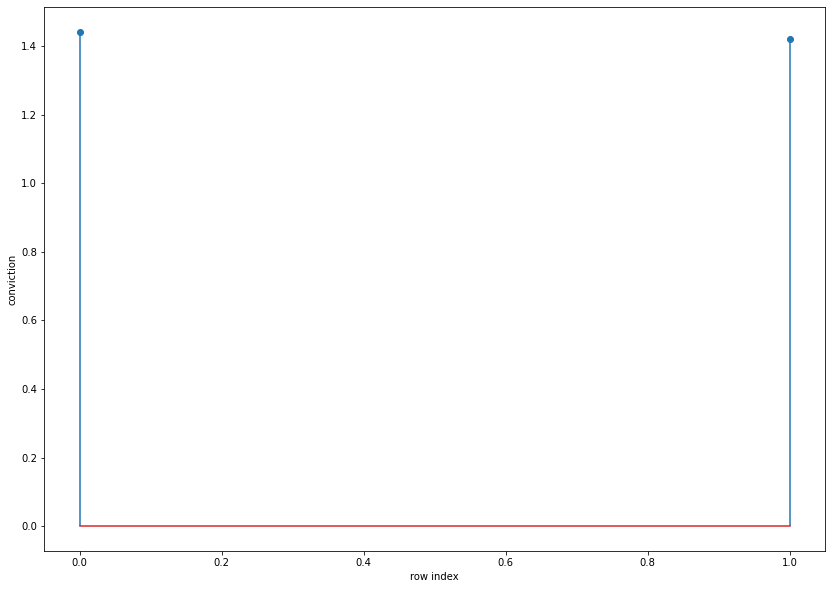

In [94]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules2)),np.round(rules2["conviction"],4))




In [95]:
#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules2.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules2[rules2.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


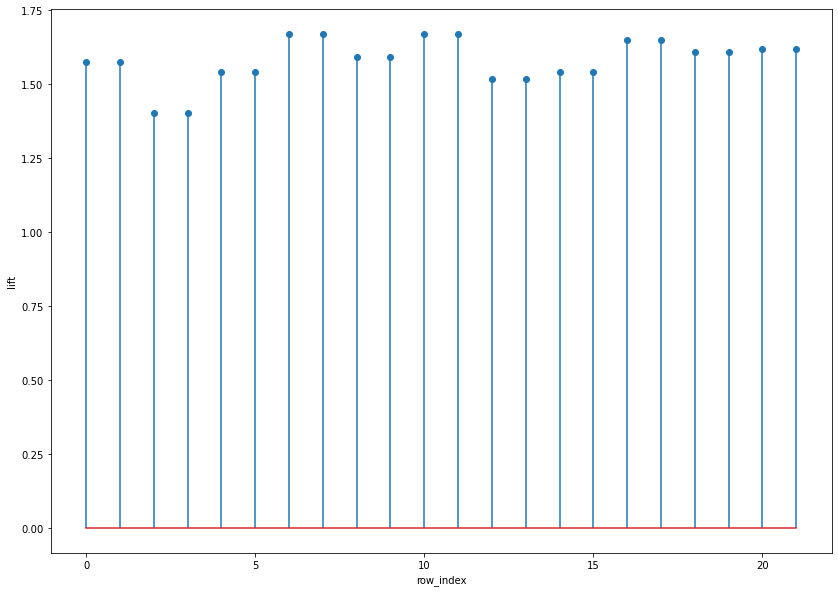

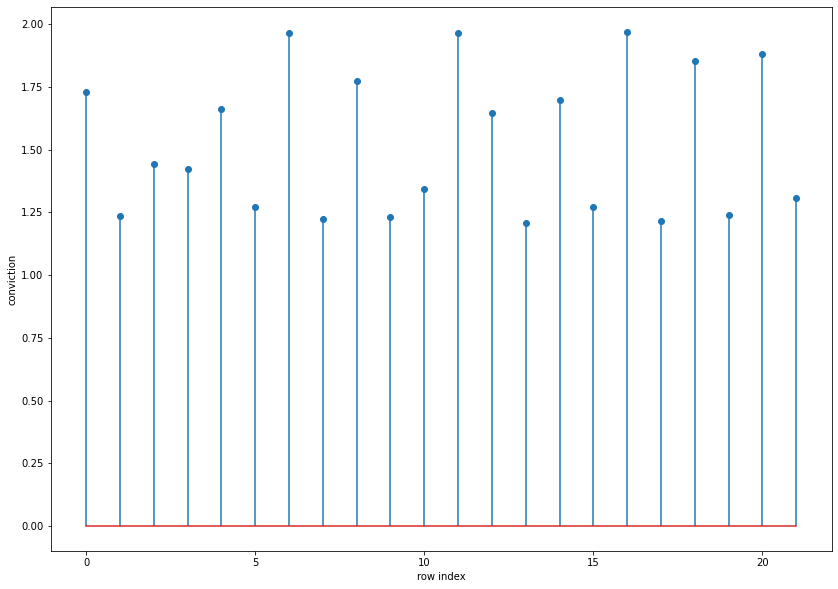

In [99]:
#here we take min_support=0.15, min_threshold=0.4

frequent_itemsets3 = apriori(data, min_support=0.15, use_colnames=True,)
frequent_itemsets3.head()

rules3= association_rules(frequent_itemsets3, metric="lift", min_threshold=0.4)

   #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules3)),np.round(rules3["lift"],4))


#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules3)),np.round(rules3["conviction"],4))


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules3.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules3[rules3.lift>1]#here the consequent items are more dependent to the antecedent items

In [100]:
rules3.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
